## 创建迭代器
（1）iter() 方法，将可迭代对象转化成迭代器；  
（2）`__iter__()` 与 `__next__()` 魔术方法，定义类实现这两个魔术方法；  
（3）itertools 模块，使用内置模块生成迭代器；  
（4）其它创建方法，如 zip() 、map() 、enumerate() 等等。  

## 迭代对象与迭代器

- 迭代对象：实现 `__iter__()` 方法的对象就是可迭代对象
- 迭代器：同时实现了 `__iter__` 方法 和 `__next__` 方法的对象定义为迭代器  
`__next__` 能实现自我的迭代/遍历过程

**区别：**  
- 迭代是一种遍历元素的方式，按照实现方式划分，有外部迭代与内部迭代两种，支持外部迭代（它遍历）的对象就是可迭代对象，而同时还支持内部迭代（自
遍历）的对象就是迭代器；按照消费方式划分，可分为复用型迭代与一次性迭代，普通可迭代对象是复用型的，而迭代器是一次性的。  

- 迭代器使用的是消耗型的遍历，这意味着它充满不确定性，即其长度与索引键值对是动态衰减的，所以很难 get 到它的 item ，也就不再需要 `__getitem__` 属性了  

### 判断对象是否是可迭代对象方法？
```
# 方法1：dir()查看__iter__
dir(2)     # 没有，略
dir("abc") # 有，略

# 方法2：isinstance()判断
import collections
isinstance(2, collections.Iterable)     # False
isinstance("abc", collections.Iterable) # True

# 方法3：hasattr()判断
hasattr(2,"__iter__")     # False
hasattr("abc","__iter__") # True

# 方法4：用iter()查看是否报错
iter(2)     # 报错：'int' object is not iterable
iter("abc") # <str_iterator at 0x1e2396d8f28>

### PS：判断是否可迭代，还可以查看是否实现__getitem__
```

In [20]:
print(hasattr(2,"__iter__"))     
print(hasattr("abc","__iter__"))

False
True


## zip()
zip() 方法可以同时迭代多个序列，并各取一个元素，生成一个可返回元组的迭代器。此迭代器的长度以较短序列的长度保持一致，若想生成较长序列的长度，需要使用 itertools 模块的 zip_longest() 方法。

In [8]:
import itertools

a = [1, 2, 3]
b = ['w', 'x', 'y', 'z']

for i in zip(a,b):
    print(i,end=" ")  

print('\n')    

# 空缺值以 None 填补
for i in itertools.zip_longest(a,b):
    print(i,end=" ")

(1, 'w') (2, 'x') (3, 'y') 

(1, 'w') (2, 'x') (3, 'y') (None, 'z') 

## enumerate()
enumerate() 方法接收一个序列类型参数，生成一个可返回元组的迭代器，元组内容是下标及其对应的元素值。它还可接收一个可选参数，指定下标的起始值，默认是0

In [5]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

for i in enumerate(seasons):
    print(i,end=" ")  

print('\n')
    
for i in enumerate(seasons, start=7):
    print(i,end=" ")  

(0, 'Spring') (1, 'Summer') (2, 'Fall') (3, 'Winter') 

(7, 'Spring') (8, 'Summer') (9, 'Fall') (10, 'Winter') 

## map()
map() 方法的参数是一个函数及一个或多个可迭代对象，它会将可迭代对象的元素映射到该函数中，然后迭代地运行该函数，返回结果也是一个迭代器。当存在多个可迭代对象参数时，迭代长度等于较短对象的长度。

In [2]:
def square(x):
    return x ** 2

l = map(square, [1, 2, 3, 4, 5])
print(list(l))

m = map(lambda x, y: x + y, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10, 2])
print(list(m))

[1, 4, 9, 16, 25]
[3, 7, 11, 15, 19]


## filter()
filter() 方法的参数是一个判断函数及一个可迭代对象，遍历可迭代对象执行判断函数，过滤下判断为True 的元素，与它相对，若想保留判断为 False 的元素，可使用 itertoole 模块的 filterfalse() 方法。

In [16]:
import itertools

fi = filter(lambda x: x%2, range(10))   # 保留余数为1的
ff = itertools.filterfalse(lambda x: x%2, range(10))   # 保留余数为0的

for i in fi:
    print(i,end=" ")

print('\n')

for i in ff:
    print(i,end=" ")


1 3 5 7 9 

0 2 4 6 8 

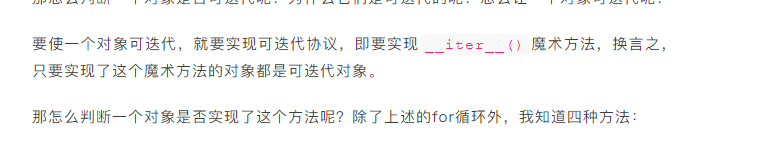